# Exploratory Data Analysis on Retial Sales
**Level 1 --> Project 1** 

In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For handling date and time data
from datetime import datetime
# creating various types of charts and visualizations
import plotly.graph_objects as go

### Load, Inspect And Cleaning

In [2]:
df=pd.read_csv('retail_sales_dataset.csv')

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#### About The Coulumns

**Transaction ID**: A unique identifier for each transaction, allowing tracking and reference.

**Date**: The date when the transaction occurred, providing insights into sales trends over time.

**Customer ID**: A unique identifier for each customer, enabling customer-centric analysis.

**Gender**: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

**Age**: The age of the customer, facilitating segmentation and exploration of age-related influences.

**Product Category**: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

**Quantity**: The number of units of the product purchased, contributing to insights on purchase volumes.

**Price per Unit**: The price of one unit of the product, aiding in calculations related to total spending.

**Total Amount**: The total monetary value of the transaction, showcasing the financial impact of each purchase.


In [5]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.shape

(1000, 9)

In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'coerce' turns errors to NaT (missing)

In [9]:
df=df.drop_duplicates()

In [10]:
df = df.dropna()

In [11]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [12]:
df['Age'].value_counts().sort_index()

Age
18    21
19    21
20    21
21    20
22    27
23    24
24    15
25    20
26    22
27    23
28    21
29    16
30    22
31    22
32    19
33    10
34    28
35    22
36    15
37    16
38    19
39    18
40    24
41    21
42    26
43    31
44    15
45    17
46    25
47    26
48    18
49    19
50    23
51    30
52    22
53    17
54    28
55    21
56    19
57    30
58    14
59    17
60    22
61    18
62    27
63    17
64    31
Name: count, dtype: int64

### Descriptive Statistics

In [13]:
mean_values = df.mean(numeric_only=True)
print("Mean Values:\n",mean_values)

Mean Values:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64


In [14]:
median_values = df.median(numeric_only=True)
print("\nMedian Values:\n", median_values)


Median Values:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64


In [15]:
mode_values = df.mode(numeric_only=True).iloc[0]  # Mode can have multiple values; .iloc[0] gives the first mode
print("\nMode Values:\n", mode_values)


Mode Values:
 Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64


In [16]:
std_dev_values = df.std(numeric_only=True)
print("\nStandard Deviation:\n", std_dev_values)    


Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [17]:
min_values = df.min(numeric_only=True)
max_values = df.max(numeric_only=True)

print("\nMinimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)


Minimum Values:
 Transaction ID     1
Age               18
Quantity           1
Price per Unit    25
Total Amount      25
dtype: int64

Maximum Values:
 Transaction ID    1000
Age                 64
Quantity             4
Price per Unit     500
Total Amount      2000
dtype: int64


In [18]:
percentiles = df.quantile([0.25, 0.5, 0.75], numeric_only=True)
print("\nPercentiles (25th, 50th, 75th):\n", percentiles)


Percentiles (25th, 50th, 75th):
       Transaction ID   Age  Quantity  Price per Unit  Total Amount
0.25          250.75  29.0       1.0            30.0          60.0
0.50          500.50  42.0       3.0            50.0         135.0
0.75          750.25  53.0       4.0           300.0         900.0


### Time Series Analysis

In [19]:
# Set Date as index
df.set_index('Date', inplace=True)
# Resample sales data by month and calculate the sum
monthly_sales = df['Total Amount'].resample('M').sum()

print("Monthly Sales:\n", monthly_sales)


Monthly Sales:
 Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64


C:\Users\Muhammad Faiq\AppData\Local\Temp\ipykernel_18088\1565053927.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()


In [20]:
# Display the first and last date in the data
first_date = df.index.min()
last_date = df.index.max()

# Calculate total sales from the first date to the last date
total_sales = df['Total Amount'].sum()
print("Total Sales from", first_date, "to", last_date, "is:", total_sales)


Total Sales from 2023-01-01 00:00:00 to 2024-01-01 00:00:00 is: 456000


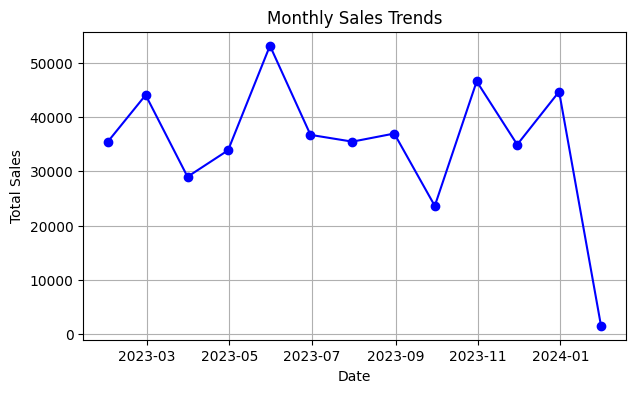

In [21]:
# Plot monthly sales
plt.figure(figsize=(7, 4))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

*The line chart shows that  a high peak in May with more than 50,000 total sales. However, the data for January 2024 only shows 1 day of sales that why it's comes to low*

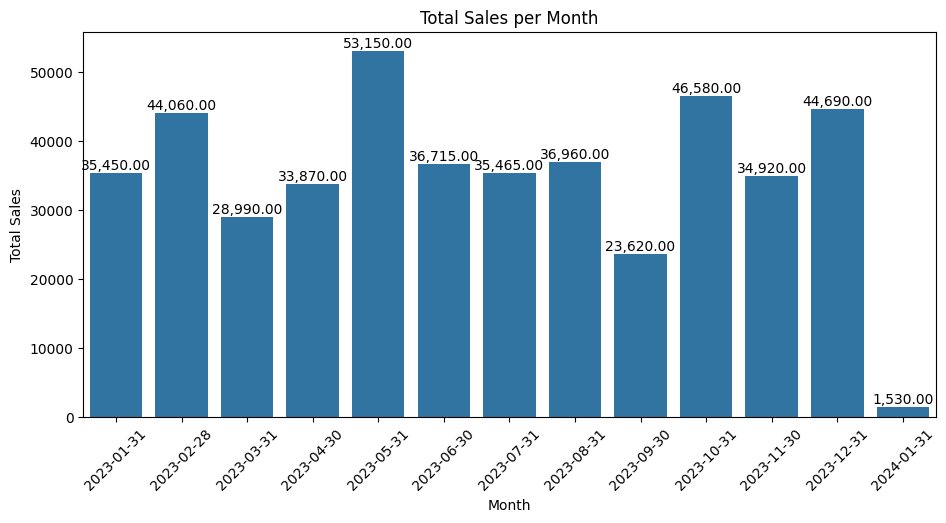

In [22]:
# Create a bar plot without passing the palette, as hue is not needed
plt.figure(figsize=(11, 5))
ax = sns.barplot(x=monthly_sales.index, y=monthly_sales.values)

# Add title and labels
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add sales values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


*The graph shows that Sales peaked in May 2023, at 53,150.00 and  September has the lowest sales at around 23,620.00. However, the data for January 2024 only shows 1 day of sales, which is why the sales are much lower at 1,530.00.*

In [23]:
# Calculate total sales from the first date to the last date
total_sales = df['Total Amount'].sum()

# Create a card-style figure
fig = go.Figure(go.Indicator(
    mode="number",
    value=total_sales,
    title={'text': "Total Sales of 2023"},
    number={'prefix': "$", 'font': {'size': 40}},
))

# Update layout for better styling (optional)
fig.update_layout(
    width=400,
    height=200,
    template="plotly_white",
)

# Show the card
fig.show()




*Total Sales Of 2023 Year From 2023-01-01 to 2023-01-01 is 456K*

### Customer and Product Analysis

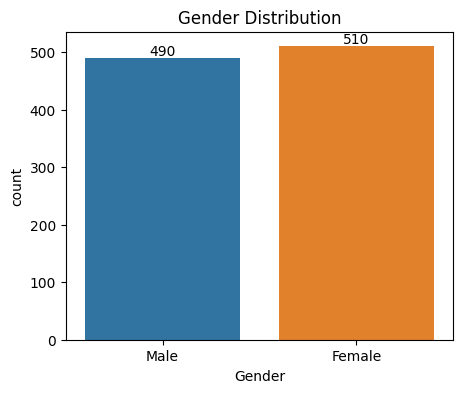

In [24]:
colors = [ '#1f77b4','#ff7f0e']  # Blue for Male, Orange for Female
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Gender',data=df,hue='Gender', palette=colors)
plt.title("Gender Distribution")
for bars in ax.containers:
    ax.bar_label(bars)

*A Bar chart Show that Female is greater than Male*

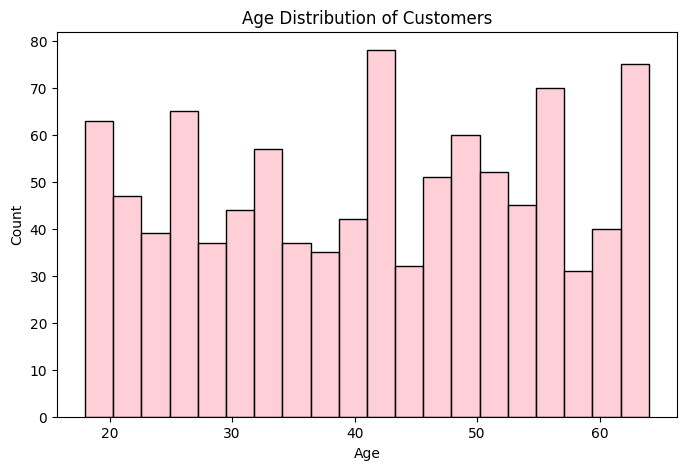

In [25]:
# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, color='pink')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

*The chart conclude that there are many customers in the 40s age group, and there are also many customers in the 60s age group. The smallest age group is the 50s*

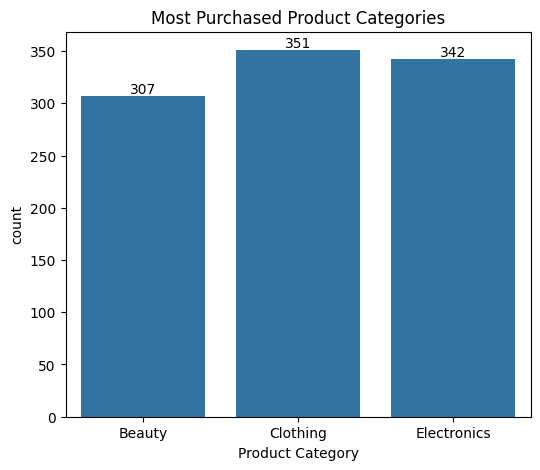

In [26]:
# Plot most purchased product categories
plt.figure(figsize=(6,5))
ax=sns.countplot(x='Product Category',data=df)
plt.title("Most Purchased Product Categories")
for bars in ax.containers:
    ax.bar_label(bars)


*Above chart Concluded that Clothing is the most popular product category, followed by electronics and then beauty.*

In [27]:
# Calculate total spending per customer
customer_spending = df.groupby('Customer ID')['Total Amount'].sum()
# Calculate average spending
average_spending = customer_spending.mean()
print("Average Spending per Customer:$",average_spending)


Average Spending per Customer:$ 456.0


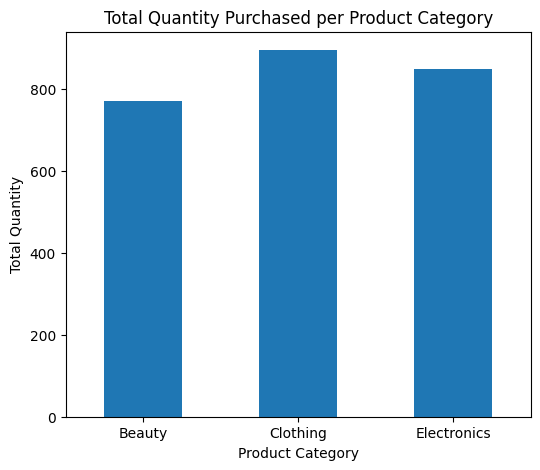

In [28]:
# Calculate total quantity per product category
quantity_per_category = df.groupby('Product Category')['Quantity'].sum()

# Plot total quantity per category
plt.figure(figsize=(6, 5))
quantity_per_category.plot(kind='bar')
plt.title('Total Quantity Purchased per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.show()


*This bar chart shows the total quantity of each product category purchased. Clothing was purchased the most, followed by Electronics and then Beauty.*

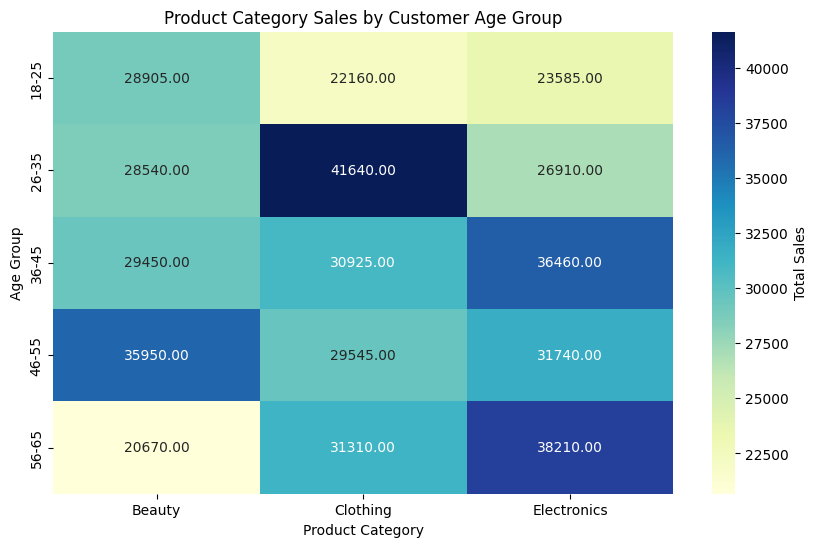

In [29]:
# Define age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and product category, then sum sales
sales_by_age_category = df.groupby(['Age Group', 'Product Category'],observed=True)['Total Amount'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sales_by_age_category, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Total Sales'})
plt.title('Product Category Sales by Customer Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.show()

*This Chart conclude that sales of beauty products is the highest in the 46-55 age group, the sales of clothing products is the highest in the 26-35 age group and the sales of electronics products is the highest in the 56-65 age group.*

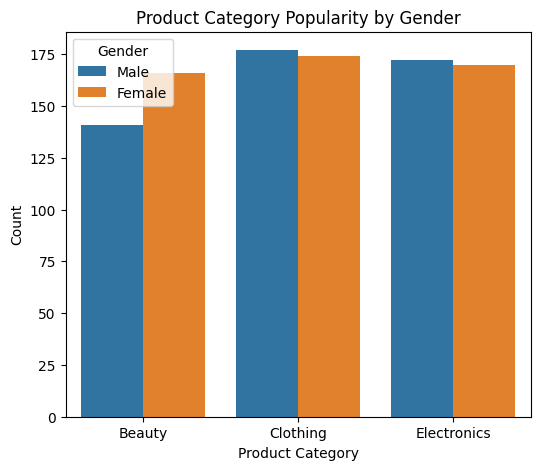

In [30]:
# Create a bar plot to show product category popularity by gender
plt.figure(figsize=(6, 5))
sns.countplot(x='Product Category', hue='Gender', data=df, palette=colors)
plt.title('Product Category Popularity by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

*The graph shows product category popularity by gender, with beauty being the most popular category for females and electronics being the most popular category for males.*

In [31]:
df.reset_index(inplace=True)

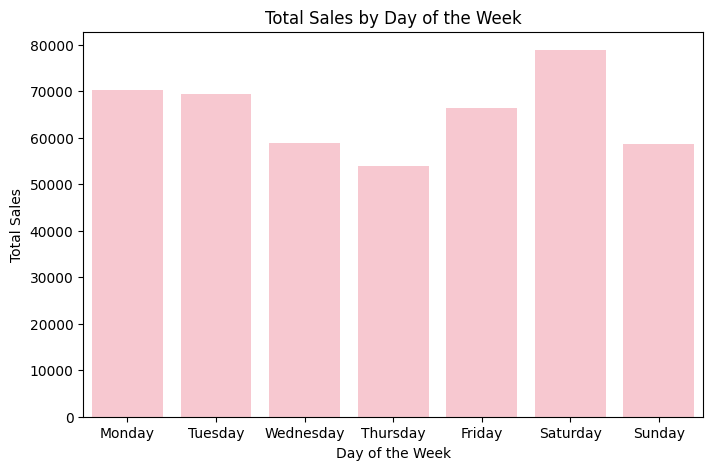

In [32]:
# Extract the day of the week from the Date column
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group data by day of the week and sum the total sales
sales_by_day = df.groupby('DayOfWeek')['Total Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)  # Reindex to ensure correct day order

# Plot the sales by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, color='pink')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


*Sales are highest on Saturday with 79000 followed by Tuesday and Monday. Sales are lowest on Thursday with 54000*

#### Conclusion

In analyzing the retail sales data, clear patterns emerged around customer demographics, purchasing behaviors, and product preferences. Sales were strongest in May, indicating possible seasonal or promotional trends, while overall annual sales reached 456K in 2023. The data shows a higher female customer base, with a large portion in the 40s and 60s age groups, and spending averages around $456 per customer. Clothing, electronics, and beauty are top categories, with specific age groups favoring different products. Additionally, weekly sales peak on Saturdays, suggesting that targeted promotions could be most effective on weekends. Overall, these insights provide a foundation for personalized marketing, age- and gender-based product targeting, and strategic inventory planning to drive growth.

### Recommendations

**Peak Month Promotions**: Run targeted campaigns in May to leverage high sales, and consider September promotions to boost low sales.

**Weekend Sales Boost**: Focus on exclusive weekend promotions, especially Saturdays.

**Age-Targeted Marketing**: Tailor campaigns for 40s and 60s age groups, focusing on quality products.

**Top Product Categories**: Prioritize inventory and marketing for clothing, electronics, and beauty products.

**Gender-Specific Promotions**: Increase campaigns for females in beauty and clothing, and for males in electronics.

**Age-Category Preferences**: Customize recommendations to match age-specific interests (e.g., beauty for ages 46-55).

**Average Spending Increase**: Use loyalty rewards to encourage spending above the $456 average.

**Midweek Engagement**: Launch Thursday deals to boost sales on low-volume days.